### Mariam Abdelati (Data Science and Business Analytics Intern)
#### Task 6: Prediction Using Decision Tree Algorithm



In [40]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn.datasets as datasets

import warnings
warnings.filterwarnings('ignore')

#### Importing and Exploring the Data

In [80]:
# Loading the iris dataset
iris = datasets.load_iris()

# Forming the iris dataframe
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

# Display first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# dataframe dimensions
df.shape

(150, 5)

In order to prepare our data, it is important to tackle missing values. Hence, the sum of missing values is determined.

In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Since the sum of missing values is 0 for all columns, there will be no imputations needed. We can proceed to determining some basic statistics and relationships for the values in the df. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The feature types of the entries in the data frame are all float64 except for the species which is an object. The predictions for the model will be compared against the target variable, the species. No data type conversions will be needed in the preprocessing process.

In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


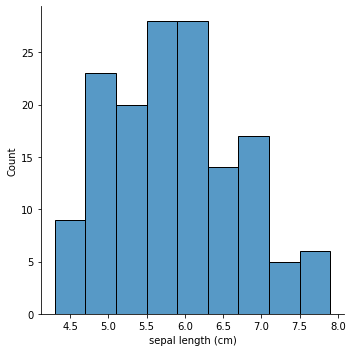

In [19]:
# sepal length distribution
ax = sns.displot(df, x='sepal length (cm)')

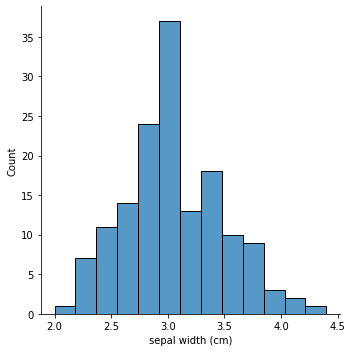

In [20]:
# sepal width distribution
ax = sns.displot(df, x='sepal width (cm)')

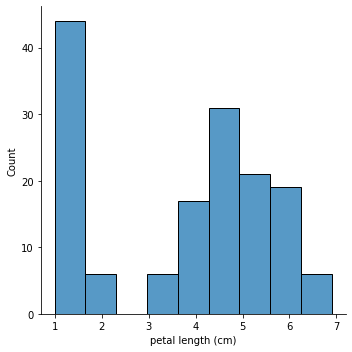

In [21]:
# petal length distribution
ax = sns.displot(df, x='petal length (cm)')

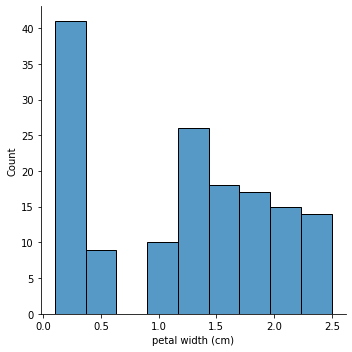

In [22]:
# petal length distribution
ax = sns.displot(df, x='petal width (cm)')

The graphs depict the continuous values for the float64 variables. 

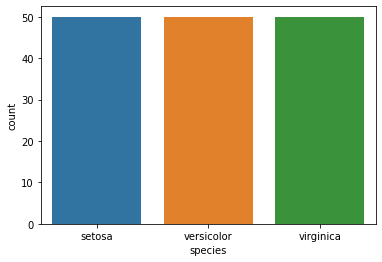

In [ ]:
# species count
ax = sns.countplot(df.species, order=pd.value_counts(df.species).index)

The count plot shows that there are 3 species categories for the dataset which are equally distributed/balanced (each being 50). Now, let's determine the relationships between the features and the target variable. To do that, a boxplot is created to identify the trends for each of the features and the species.

<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>

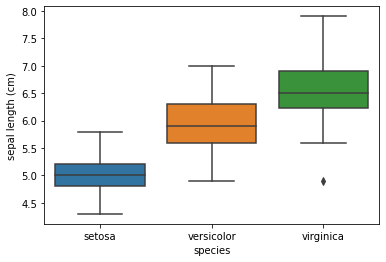

In [68]:
# relationship between sepal length and species
sns.boxplot(x=df.species, y='sepal length (cm)', data=df)

It is noticeable that the setosa is classifiable having a sepal length of >= 5.5
The other features can be seen overlapping with one another.

<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

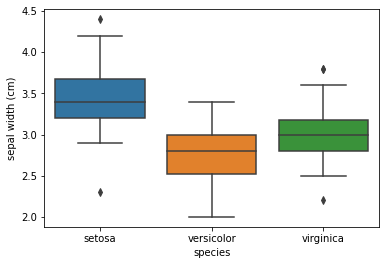

In [69]:
# relationship between sepal width and species
sns.boxplot(x=df.species, y='sepal width (cm)', data=df)

It is noticeable there is a great overlap between each of the categories, with some outliers for the sepal width. This feature may not be considered for improving model's accuracy since almost all the classified categories lie in the range of 2.5 and 3.5. 

<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

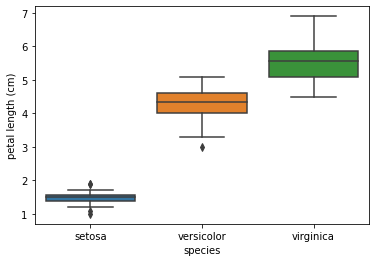

In [66]:
# relationship between petal length and species
sns.boxplot(x=df.species, y='petal length (cm)', data=df)

it can be seen that setosa is clearly classifiable lying in the region between 0.5 and 2. Versicolor is also clearly classifiable between 3 and 4.7. Virginia is also classifiable in the range 4.8 and 7. Thus, petal length is an **important** feature in the model.

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

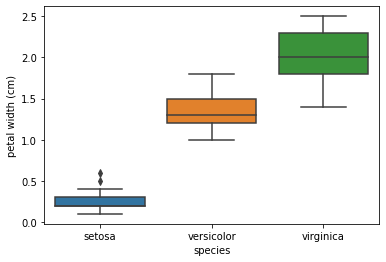

In [67]:
# relationship between petal width and species
sns.boxplot(x=df.species, y='petal width (cm)', data=df)

It can be also seen again that setosa is identifiable between 0.1 and 0.7 while the others have an overlap with one another.

To have an even further look at the model, the areas for the sepals and petals can be considered to identify if the species is identifiable in that case. 

<AxesSubplot:xlabel='species'>

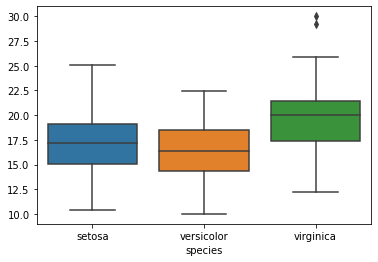

In [74]:
# relationship between sepal area  and species
sns.boxplot(x=df.species, y=df['sepal length (cm)']*df['sepal width (cm)'], data=df)

Since the features all overlap, this feature is not useful for the model.

<AxesSubplot:xlabel='species'>

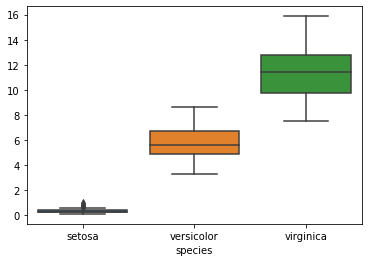

In [71]:
# relationship between petal area and species
sns.boxplot(x=df.species, y=df['petal length (cm)']*df['petal width (cm)'], data=df)

It can be seen that the three species are almost all classifiable.
- for setosa, the range of the petal area is between 0 and 1.2.
- for versicolor, the area is between 3 and 9. An intersection can be seen with virginica which ranges from 7.5 and 16.

#### Feature Selection and Data Preparation

As established earlier, there are some featires not useful for the model so can be dropped for instance the sepal width which contains a lot of overlap with other features.

In [81]:
df.drop('sepal width (cm)', axis=1, inplace=True)
df.head()

,sepal length (cm),petal length (cm),petal width (cm),species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa
3,4.6,1.5,0.2,setosa
4,5.0,1.4,0.2,setosa


Now, let's add the petal area to the dataframe

In [82]:
petal_area = df['petal length (cm)']*df['petal width (cm)']
df['petal area'] = petal_area
df.head()

,sepal length (cm),petal length (cm),petal width (cm),species,petal area
0,5.1,1.4,0.2,setosa,0.28
1,4.9,1.4,0.2,setosa,0.28
2,4.7,1.3,0.2,setosa,0.26
3,4.6,1.5,0.2,setosa,0.30
4,5.0,1.4,0.2,setosa,0.28


#### Model Building

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [83]:
target_variable = df['species']
df.drop('species', axis=1, inplace=True)
df.head()

,sepal length (cm),petal length (cm),petal width (cm),petal area
0,5.1,1.4,0.2,0.28
1,4.9,1.4,0.2,0.28
2,4.7,1.3,0.2,0.26
3,4.6,1.5,0.2,0.30
4,5.0,1.4,0.2,0.28


In [171]:
x_train, x_test, y_train, y_test = train_test_split(df, target_variable, random_state=42, test_size=0.3)

In [172]:
model = DecisionTreeClassifier(criterion='entropy')

In [173]:
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

#### Predicting using Test Data

In [174]:
y_predict = model.predict(x_test)

##### Calculating Model Accuracy

In [175]:
from sklearn.metrics import accuracy_score
print('Model accuracy on train data: ', accuracy_score(y_true=y_train, y_pred=model.predict(x_train)))
print('Model accuracy on test data: ', accuracy_score(y_true=y_test, y_pred=y_predict))

Model accuracy on train data:  1.0
Model accuracy on test data:  0.9777777777777777


The model has 97.78% accuracy score which is highly accurate. It must be noted though that this model is for 1 random state, another random state can give a better result and that can be determined by finding the random state with the highest score as an extension. But for now, let's move on to vidualizing the decision tree. 

#### Visualizing the Decision Tree

In [176]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

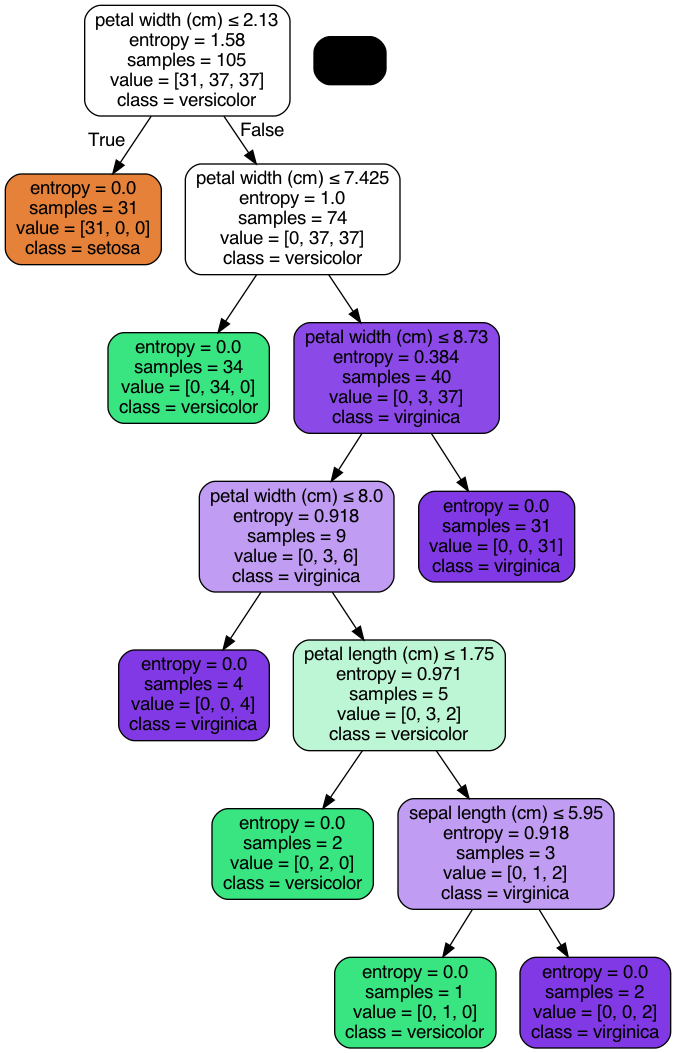

In [183]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), height=800, width=600)